In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np


In [2]:
class Tree:
    
    def __init__(self, root):
        self.root = root
        self.labels = []
        root.setTree(self)
        self.generate(root)

        self.pos = None
        self.edges =  None
        self.colors = None
        self.weights = None
        self.node_colors = []

    @abstractmethod
    def generate(self, node):
        pass
    
    def addLabel(self, label: int):
        self.labels.append(label)

class Node:
    TEAL = "#e6f2f2"
    GOLD = "#fcc200"
    PURPLE = "#f9e6ec"

    colors = [TEAL, GOLD, PURPLE]
    
    columns = []

    def __init__(self, label):
        self.tree = None
        self.predecessor = None
        self.successors = [] 
        self.label = label
        #self.col = 0
        self.row = 0

    def addSuccessor(self, successor):
        successor.row = self.row + 1
        if self.tree is not None and not successor.label in self.tree.labels:
            successor.setTree(self.tree)
            successor.predecessor = self
            self.successors.append(successor)
    
    def setTree(self, tree: Tree):
        self.tree = tree
        self.tree.addLabel(self.label)
        self.tree.genColCluster()

    def getType(label):
        if (label + 1) % 3 == 0:
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1

In [3]:
def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def fG(num):
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"

In [4]:
#Aberkane Tree
class AberkaneTree(Tree):
    def __init__(self, root: Node, height: int):
        self.height = height
        self.columns = []
        self.predecessor_con = []
        self.successor_con = []
        self.connection_id = 0
        self.movement_con = []
        super().__init__(root)   

    def generate(self, node: Node):
        mid_in_range = True
        left_in_range = True
        right_in_range = True

        label = node.label
        h = self.height - 1
        b_leaf = 1
        for i in range(1,h+1):
            b_leaf = int(b_leaf * 2 + 1) 

        if (node.label * 4 + 1) > (b_leaf):
            mid_in_range = False
        else:
            mid_in_range = True

        if (node.label * 2 + 1) > (b_leaf):
            right_in_range = False
        else:
            right_in_range = True

        if (node.label * 2 - 1) > (b_leaf):
            left_in_range = False
        else:
            left_in_range = True

        if node.label == 1:         
            right_child =  Node(node.label * 2 + 1)      
            node.addSuccessor(right_child)          
            self.generate(right_child)      
            self.predecessor_con.append(1)
            self.successor_con.append(3) 
            self.predecessor_con.append(1)
            self.successor_con.append(5) 
            self.connection_id = self.connection_id + 2
        else:          
            if mid_in_range == True:
                middle_child = Node(node.label * 4 + 1)          
            if right_in_range == True:
                right_child = Node(node.label * 2 + 1)
            if left_in_range == True:
                left_child = Node(node.label * 2 - 1)

            if right_in_range == True:
                node.addSuccessor(right_child)
            if mid_in_range == True:
                node.addSuccessor(middle_child)
            if left_in_range == True:
                node.addSuccessor(left_child)

            if right_in_range == True:
                self.generate(right_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(right_child.label)
                self.connection_id = self.connection_id + 1
            if mid_in_range == True:
                self.generate(middle_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(middle_child.label)
                self.connection_id = self.connection_id + 1
            if left_in_range == True:
                self.generate(left_child)
                self.predecessor_con.append(node.label)
                self.successor_con.append(left_child.label)
                self.connection_id = self.connection_id + 1
        
    def genColCluster(self):       
        aberkane_height = self.height-1
        col_arr = []
        big_leaf = int(1)
        used_nodes = []
        col_position = 0
        is_right = False
        is_left = False
        right_node = 0
        left_node = 0
        movement_con = []

        for i in range(1,aberkane_height+1):
            big_leaf = int(big_leaf * 2 + 1) 

        for j in range(1,big_leaf+1, 2):
            is_part = False
            col_build = []

            for x in used_nodes:
                if j == x:
                    is_part = True
            
            if is_part == False:
                used_nodes.append(int(j))
                col_build.append(int(j))

                right_node = int((j-1)/2)
                left_node = int((j+1)/2)
                    
                is_right = False
                is_left = False

                for a in used_nodes:      
                    if j == 1:
                        is_right = True
                        is_left = True
                    elif a == int(right_node):
                        is_right = True
                    elif a == int(left_node):
                        is_left = True
                            
                test_node = j*4+1
                while(test_node < big_leaf):
                    test_node_is_part = False
                    for y in used_nodes:
                        if test_node == y:
                            test_node_is_part = True
                            test_node = big_leaf+1
                    if test_node_is_part == False:
                        col_build.append(int(test_node))
                        used_nodes.append(int(test_node))
                        test_node = test_node * 4 + 1

                col_position
                len_col_i = 0
                len_columns = len(col_arr)

                for i in range(0,len_columns):
                    len_col_i = len(col_arr[i])
                    for j in range(0, len_col_i):
                        if col_arr[i][j] == left_node or col_arr[i][j] == right_node:
                            col_position = i 

                if is_left == True and is_right == True:
                    col_arr.append(col_build)
                    movement_con.append(left_node)
                elif is_left == True:
                    if col_position == 0:
                        col_arr.insert(col_position, col_build)
                    else:
                        col_arr.insert(col_position, col_build)
                    
                    movement_con.append(col_build[0])

                elif is_right == True:
                    col_arr.insert(col_position+1, col_build)
                    
        self.movement_con = movement_con
        self.columns = col_arr
        return

    def addVertex(self,start, G):
        big_leaf = 1
        for i in range(1,self.height):
            big_leaf = int(big_leaf * 2 + 1) 
        cur_leaf = start
        next_leaf_mid = 1
        next_leaf_right = 1
        counter = 1
        if start < big_leaf:
            while (counter < self.height+1):
                next_leaf_mid = cur_leaf * 4 + 1
                next_leaf_right = cur_leaf * 2 + 1
                if (cur_leaf < big_leaf) and next_leaf_right <= big_leaf:
                    G.add_edge(cur_leaf,next_leaf_right ,color='black',weight=5)
                    right_up = next_leaf_right * 4 + 1
                    while right_up <= big_leaf:
                        if right_up * 2 + 1 <= big_leaf:
                            self.addVertex(right_up*2+1, G)
                        right_up = right_up * 4 + 1
                if (cur_leaf < big_leaf) and next_leaf_mid <= big_leaf:
                    G.add_edge(next_leaf_right,next_leaf_mid,color='black',weight=5)
                    if next_leaf_mid * 2+1 <= big_leaf:
                        self.addVertex(next_leaf_mid * 2+1, G)
                    mid_in_range = next_leaf_mid
                    while mid_in_range <= big_leaf:
                        if mid_in_range * 2+1 <= big_leaf:
                            self.addVertex(mid_in_range * 2+1, G)
                        mid_in_range = mid_in_range * 4 + 1
                cur_leaf = (cur_leaf * 2 + 1)*2+1
                counter = counter + 2

    def addRuleThree(self, G, mX, mN):
        big_leaf = 1
        for i in range(1,self.height):
            big_leaf = int(big_leaf * 2 + 1) 

        numArr = []
        xMax = mX
        nMax = mN

        for n in range(1,nMax+1):
            
            if 3**n > big_leaf:
                break

            for x in range(1,xMax+1):
                if x%3 == 0:
                    True
                else:
                    y = 3**n * x


                    for i in range(1,n+1):
                        firstPart = V((4**i)*(3**(n-i)*x))
                        secondPart = S(firstPart*x)
                        firstType = getType(firstPart)
                        secondType = getType(secondPart)
                        
                        #print(firstPart)
                        #print(secondPart)
                        #print(big_leaf)
                        if firstPart <= big_leaf:
                            numArr.append([y, firstPart, firstType])                    

                            if firstPart == 17:
                                G.add_edge(1,17,color='yellow',weight=5)
                                True
                            elif (((firstPart+1)/2)%2)!=0:
                                G.add_edge((firstPart+1)/2,firstPart,color='yellow',weight=5)
                            elif (((firstPart-1)/2)%2)!=0:
                                G.add_edge((firstPart-1)/2,firstPart,color='yellow',weight=5)
                            
                        if secondPart <= big_leaf:
                            numArr.append([y, secondPart, secondType])

                            if firstPart == 17:
                                #G.add_edge(1,secondPart,color='yellow',weight=5)
                                True
                            elif (((secondPart+1)/2)%2)!=0:
                                G.add_edge((secondPart+1)/2,secondPart,color='yellow',weight=5)
                            elif (((secondPart-1)/2)%2)!=0:
                                G.add_edge((secondPart-1)/2,secondPart,color='yellow',weight=5)

        # for i in numArr:
        #     if i[1] <= big_leaf:
                
        #         if i[1] == 17:
        #             G.add_edge(1,i[1],color='yellow',weight=5)
        #         elif (((i[1]+1)/2)%2)!=0:
        #             G.add_edge((i[1]+1)/2,i[1],color='yellow',weight=5)
        #         elif (((i[1]-1)/2)%2)!=0:
        #             G.add_edge((i[1]-1)/2,i[1],color='yellow',weight=5)


        #for i in 



    def addRuleFour(self, G, mX, mN):
        big_leaf = 1
        for i in range(1,self.height):
            big_leaf = int(big_leaf * 2 + 1) 
        
        numArr = []
        xMax = mX
        nMax = mN

        for n in range(1,nMax+1):
            
            if 3**n > big_leaf:
                break


            for x in range(1,xMax+1):
                if x%3 == 0:
                    True
                else:
                    y = S(3**n * x)

                    for i in range(1,n+1):
                        firstPart = S((4**i)*(3**(n-i)*x))
                        secondPart = S(firstPart*x)
                        firstType = getType(firstPart)
                        secondType = getType(secondPart)

                        numArr.append([y, firstPart, firstType])
                        numArr.append([y, secondPart, secondType])

                        if firstPart <= big_leaf:
                            numArr.append([y, firstPart, firstType])                    

                            if firstPart == 17:
                                G.add_edge(1,17,color='yellow',weight=5)
                                True
                            elif (((firstPart+1)/2)%2)!=0:
                                G.add_edge((firstPart+1)/2,firstPart,color='yellow',weight=5)
                            elif (((firstPart-1)/2)%2)!=0:
                                G.add_edge((firstPart-1)/2,firstPart,color='yellow',weight=5)
                            
                        if secondPart <= big_leaf:
                            numArr.append([y, secondPart, secondType])

                            if firstPart == 17:
                                #G.add_edge(1,secondPart,color='yellow',weight=5)
                                True
                            elif (((secondPart+1)/2)%2)!=0:
                                G.add_edge((secondPart+1)/2,secondPart,color='yellow',weight=5)
                            elif (((secondPart-1)/2)%2)!=0:
                                G.add_edge((secondPart-1)/2,secondPart,color='yellow',weight=5)


    def addRuleFive(self, G, mX, mN):
        big_leaf = 1
        for i in range(1,self.height):
            big_leaf = int(big_leaf * 2 + 1) 

        numArr = []
        xMax = mX
        nMax = mN

        for n in range(1,nMax+1):

            if 3**n > big_leaf:
                break

            for x in range(1,xMax+1):
                if x%3 == 0:
                    True
                else:
                    y = fG(3**n * x)

                    if (y+1)%3 == 0:

                        for i in range(1,n+1):
                            firstPartSave = fG((3**(n-i)*x))
                            secondPartSave = fG((3**(n-i)*x))

                            for j in range(0,i):
                                firstPartSave = S(firstPartSave)
                            
                            for m in range(0,i+1):
                                secondPartSave = S(secondPartSave)



                            firstPart = firstPartSave
                            secondPart = secondPartSave
                            firstType = getType(firstPart)
                            secondType = getType(secondPart)

                            numArr.append([y, firstPart, firstType])
                            numArr.append([y, secondPart, secondType])

                            
                            if firstPart <= big_leaf:
                                numArr.append([y, firstPart, firstType])                    

                                if firstPart == 17:
                                    G.add_edge(1,17,color='yellow',weight=5)
                                    True
                                elif (((firstPart+1)/2)%2)!=0:
                                    G.add_edge((firstPart+1)/2,firstPart,color='yellow',weight=5)
                                elif (((firstPart-1)/2)%2)!=0:
                                    G.add_edge((firstPart-1)/2,firstPart,color='yellow',weight=5)
                                
                            if secondPart <= big_leaf:
                                numArr.append([y, secondPart, secondType])

                                if firstPart == 17:
                                    #G.add_edge(1,secondPart,color='yellow',weight=5)
                                    True
                                elif (((secondPart+1)/2)%2)!=0:
                                    G.add_edge((secondPart+1)/2,secondPart,color='yellow',weight=5)
                                elif (((secondPart-1)/2)%2)!=0:
                                    G.add_edge((secondPart-1)/2,secondPart,color='yellow',weight=5)


    def genGraphData(self, G):             
        
        
        
        for i in range(0,len(self.successor_con)):
            if self.successor_con[i] == (self.predecessor_con[i] * 2 -1):
                G.add_edge(aberkane_tree.predecessor_con[i],self.successor_con[i],color='white',weight=1)
        
        self.addRuleThree(G, 200, 20) #(G,x,n)   
        self.addRuleFour(G,200,20)
        self.addRuleFive(G,200,20)
        
        for i in range(0,len(self.successor_con)):
            if self.successor_con[i] == (self.predecessor_con[i] * 2 -1):
                True 
            elif aberkane_tree.successor_con[i] == (aberkane_tree.predecessor_con[i] * 4 + 1):
                G.add_edge(aberkane_tree.predecessor_con[i],self.successor_con[i],color='black',weight=5)
            else:
                True
                #G.add_edge(aberkane_tree.predecessor_con[i],self.successor_con[i],color='black',weight=1)
        for i in self.movement_con:
            self.addVertex(i, G)
        
        
        
        
        
        for node in G:
            color_type = Node.getType(node)
            self.node_colors.append(Node.colors[color_type-1])
        self.edges = G.edges()
        self.colors = [G[u][v]['color'] for u,v in self.edges]
        self.weights = [G[u][v]['weight'] for u,v in self.edges]

    def generatePos(self, label_value):
        col_counter = 0
        len_col_i = 0
        len_columns = len(self.columns)
        col = 0.0
        row = 0.0
        for i in range(0,len_columns):
            len_col_i = len(self.columns[i])
            for j in range(0, len_col_i):             
                if self.columns[i][j] == int(label_value):
                    col = float(i+1)
                    break
        if label_value == 1:
            row = -2*float(1) * 0.2
        elif label_value == 3:
            row = -1.5*float(2) * 0.2  
        else:
            for i in range(2,int(label_value)):
                if label_value > (2**(i-1)) and label_value < (2**i):
                    row = -1*float(i+1) * 0.2
                    break
        return (col, row)

    def generatePosArr(self):
        pos1 = {}
        len_col_i = 0
        len_columns = len(self.columns)
        for i in range(0,len_columns):
            len_col_i = len(self.columns[i])
            for j in range(0, len_col_i):
                pos1[self.columns[i][j]] = self.generatePos(self.columns[i][j])
        self.pos = pos1
        return


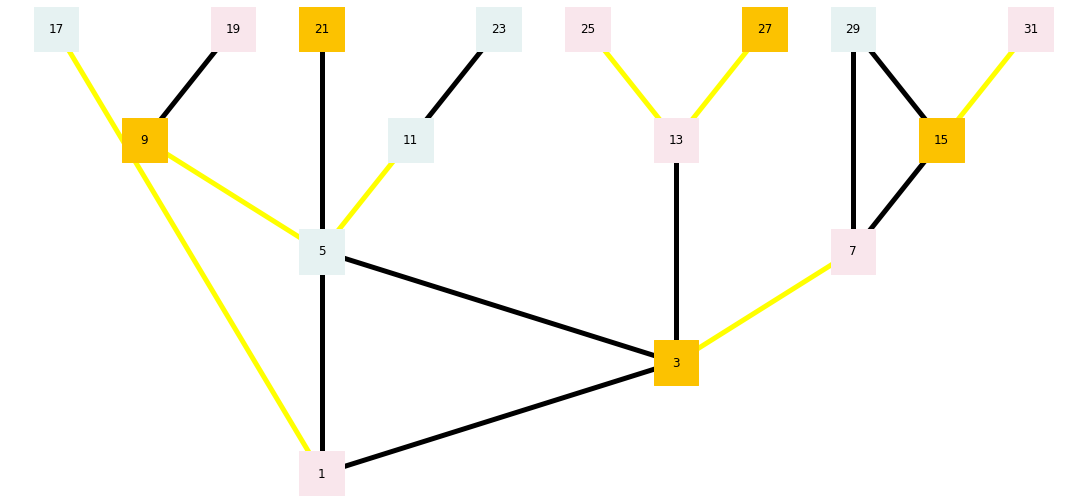

In [5]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 5) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 5
for i in range(1,(aberkane_tree.height)):
    w = w * 1.4
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

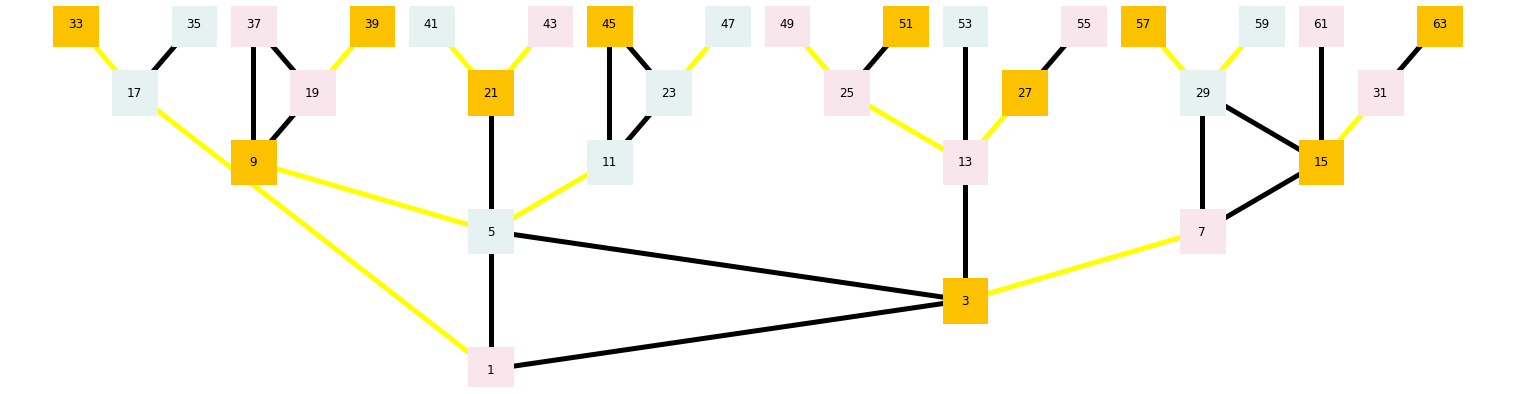

In [6]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 6) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.4
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

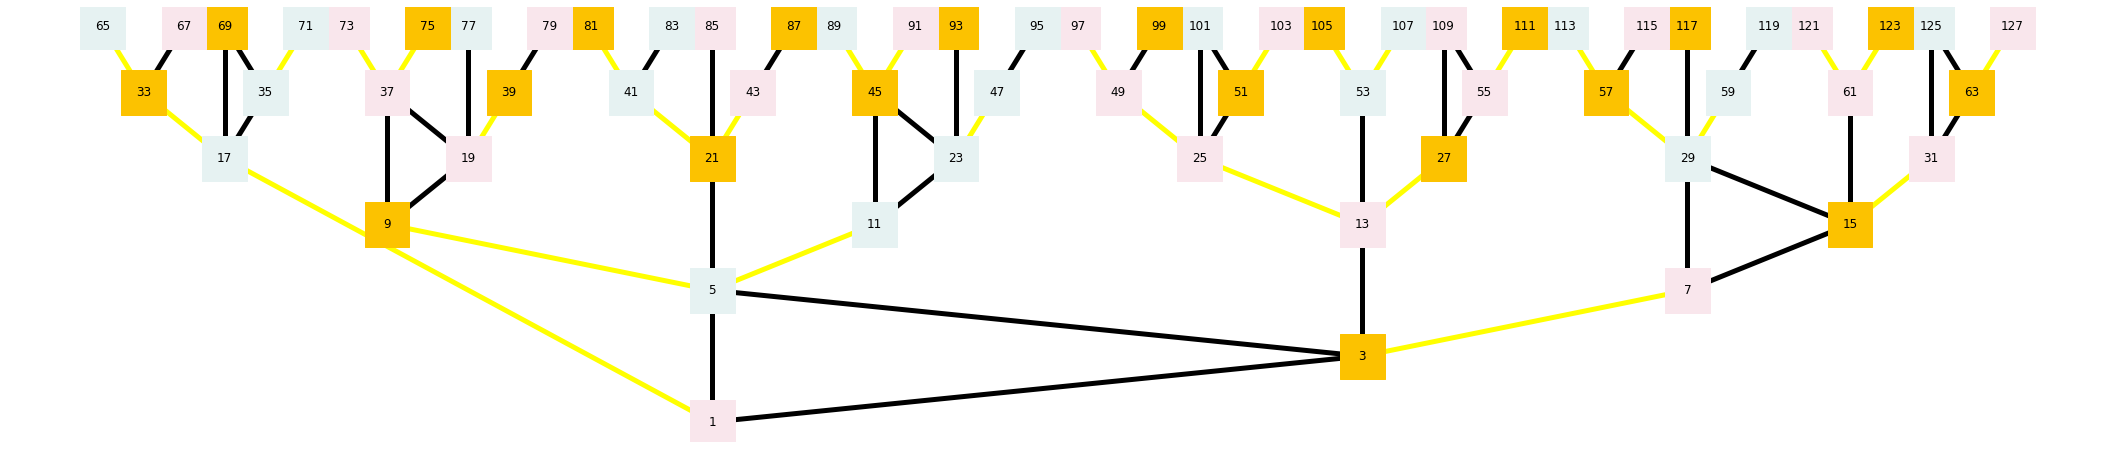

In [7]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 7) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.4
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

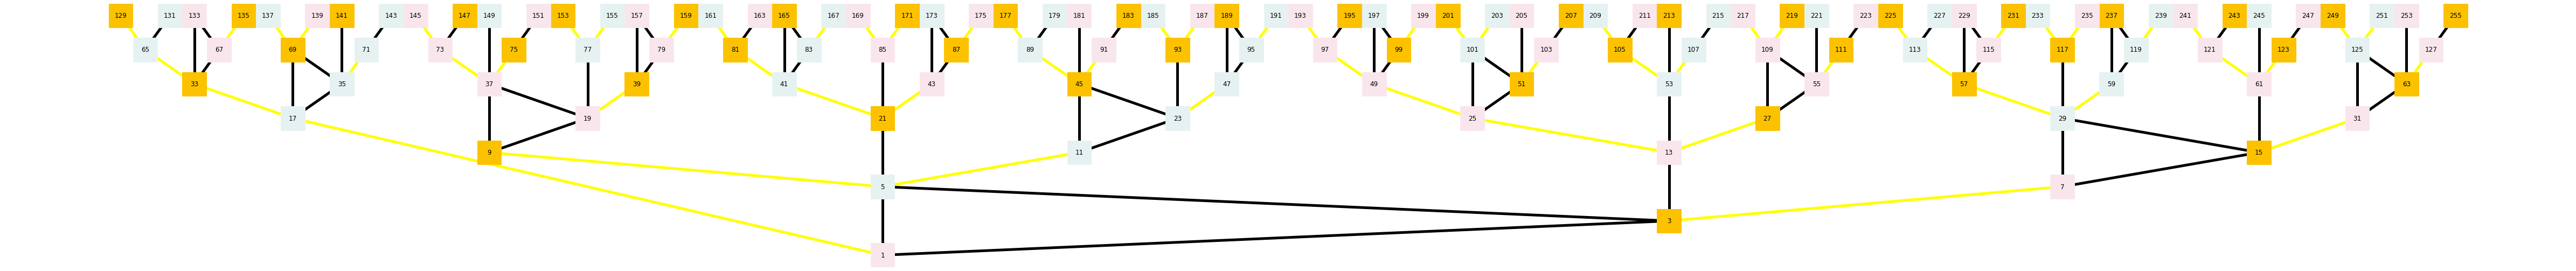

In [8]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 8) 
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.5
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

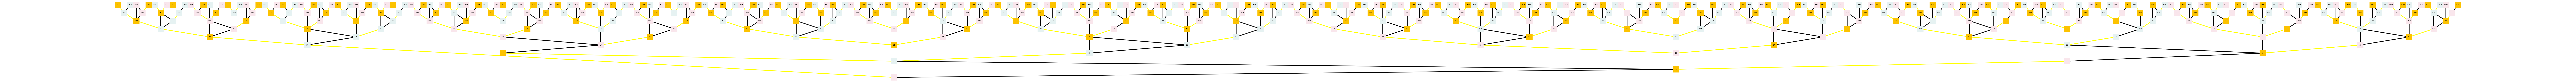

In [13]:
root = Node(1)
aberkane_tree = AberkaneTree(root, 10)
pos = aberkane_tree.generatePosArr()
G = nx.Graph()
aberkane_tree.genGraphData(G)
w = 5
h = 2
for i in range(1,(aberkane_tree.height)):
    w = w * 1.6
    h = h + 1
plt.figure(figsize=(w, h))
plt.gca().invert_yaxis()
nx.draw(G, edges = aberkane_tree.edges, edge_color=aberkane_tree.colors, width=aberkane_tree.weights,   node_color=aberkane_tree.node_colors,node_shape = "s", node_size=2000, pos=aberkane_tree.pos, with_labels=True,  linewidths=1)

In [21]:
## Rule 3

import math

def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def G(num):
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"


numArr = []
xMax = 6
nMax = 1

for n in range(1,nMax+1):

#n = 4

    for x in range(1,xMax+1):
        if x%3 == 0:
            True
        else:
            y = 3**n * x

            for i in range(1,n+1):
                firstPart = V((4**i)*(3**(n-i)*x))
                secondPart = S(firstPart*x)
                firstType = getType(firstPart)
                secondType = getType(secondPart)

                numArr.append([y, firstPart, firstType])
                numArr.append([y, secondPart, secondType])

    
print(numArr)


[[3, 17, 'A'], [3, 35, 'A'], [6, 33, 'B'], [6, 133, 'C'], [12, 65, 'A'], [12, 521, 'A'], [15, 81, 'B'], [15, 811, 'C']]


In [9]:
## Rule 4

import math

def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def G(num):
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"


numArr = []
xMax = 5
nMax = 5

for n in range(1,nMax+1):

    for x in range(1,xMax+1):
        if x%3 == 0:
            True
        else:
            y = S(3**n * x)

            for i in range(1,n+1):
                firstPart = S((4**i)*(3**(n-i)*x))
                secondPart = S(firstPart*x)
                firstType = getType(firstPart)
                secondType = getType(secondPart)

                numArr.append([y, firstPart, firstType])
                numArr.append([y, secondPart, secondType])

    
print(numArr)

[[7, 9, 'B'], [7, 19, 'C'], [13, 17, 'A'], [13, 69, 'B'], [25, 33, 'B'], [25, 265, 'C'], [31, 41, 'A'], [31, 411, 'B'], [19, 25, 'C'], [19, 51, 'B'], [19, 33, 'B'], [19, 67, 'C'], [37, 49, 'C'], [37, 197, 'A'], [37, 65, 'A'], [37, 261, 'B'], [73, 97, 'C'], [73, 777, 'B'], [73, 129, 'B'], [73, 1033, 'C'], [91, 121, 'C'], [91, 1211, 'A'], [91, 161, 'A'], [91, 1611, 'B'], [55, 73, 'C'], [55, 147, 'B'], [55, 97, 'C'], [55, 195, 'B'], [55, 129, 'B'], [55, 259, 'C'], [109, 145, 'C'], [109, 581, 'A'], [109, 193, 'C'], [109, 773, 'A'], [109, 257, 'A'], [109, 1029, 'B'], [217, 289, 'C'], [217, 2313, 'B'], [217, 385, 'C'], [217, 3081, 'B'], [217, 513, 'B'], [217, 4105, 'C'], [271, 361, 'C'], [271, 3611, 'A'], [271, 481, 'C'], [271, 4811, 'A'], [271, 641, 'A'], [271, 6411, 'B'], [163, 217, 'C'], [163, 435, 'B'], [163, 289, 'C'], [163, 579, 'B'], [163, 385, 'C'], [163, 771, 'B'], [163, 513, 'B'], [163, 1027, 'C'], [325, 433, 'C'], [325, 1733, 'A'], [325, 577, 'C'], [325, 2309, 'A'], [325, 769, 'C'

In [11]:
#Rule 5

import math

def V(num):
    return 4*num+1

def S(num):
    return 2*num+1

def G(num):
    return 2*num-1

def getType(num):
    if (num+1) %3 == 0:
        return "A"
    elif (num%3) == 0:
        return "B"
    elif (num-1)%3 == 0:
        return "C"


numArr = []
xMax = 5
nMax = 5

for n in range(1,nMax+1):

    for x in range(1,xMax+1):
        if x%3 == 0:
            True
        else:
            y = G(3**n * x)

            if (y+1)%3 == 0:

                for i in range(1,n+1):
                    firstPartSave = G((3**(n-i)*x))
                    secondPartSave = G((3**(n-i)*x))

                    for j in range(0,i):
                        firstPartSave = S(firstPartSave)
                    
                    for m in range(0,i+1):
                        secondPartSave = S(secondPart)



                    firstPart = firstPartSave
                    secondPart = secondPartSave
                    firstType = getType(firstPart)
                    secondType = getType(secondPart)

                    numArr.append([y, firstPart, firstType])
                    numArr.append([y, secondPart, secondType])

    
print(numArr)


[[5, 3, 'B'], [5, 204823, 'C'], [11, 7, 'C'], [11, 409647, 'B'], [23, 15, 'B'], [23, 819295, 'C'], [29, 19, 'C'], [29, 1638591, 'B'], [17, 11, 'A'], [17, 3277183, 'C'], [17, 7, 'C'], [17, 6554367, 'B'], [35, 23, 'A'], [35, 13108735, 'C'], [35, 15, 'B'], [35, 26217471, 'B'], [71, 47, 'A'], [71, 52434943, 'C'], [71, 31, 'C'], [71, 104869887, 'B'], [89, 59, 'A'], [89, 209739775, 'C'], [89, 39, 'B'], [89, 419479551, 'B'], [53, 35, 'A'], [53, 838959103, 'C'], [53, 23, 'A'], [53, 1677918207, 'B'], [53, 15, 'B'], [53, 3355836415, 'C'], [107, 71, 'A'], [107, 6711672831, 'B'], [107, 47, 'A'], [107, 13423345663, 'C'], [107, 31, 'C'], [107, 26846691327, 'B'], [215, 143, 'A'], [215, 53693382655, 'C'], [215, 95, 'A'], [215, 107386765311, 'B'], [215, 63, 'B'], [215, 214773530623, 'C'], [269, 179, 'A'], [269, 429547061247, 'B'], [269, 119, 'A'], [269, 859094122495, 'C'], [269, 79, 'C'], [269, 1718188244991, 'B'], [161, 107, 'A'], [161, 3436376489983, 'C'], [161, 71, 'A'], [161, 6872752979967, 'B'], [